You are given an m x n binary grid grid where 1 represents land and 0 represents water. An island is a maximal 4-directionally (horizontal or vertical) connected group of 1's.

The grid is said to be connected if we have exactly one island, otherwise is said disconnected.

In one day, we are allowed to change any single land cell (1) into a water cell (0).

Return the minimum number of days to disconnect the grid.

 

Example 1:

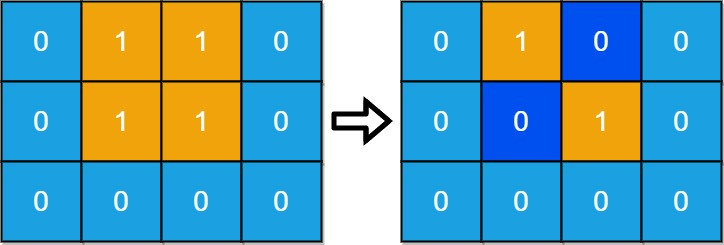

Input: grid = [[0,1,1,0],[0,1,1,0],[0,0,0,0]]

Output: 2
Explanation: We need at least 2 days to get a disconnected grid.
Change land grid[1][1] and grid[0][2] to water and get 2 disconnected island.

Example 2:

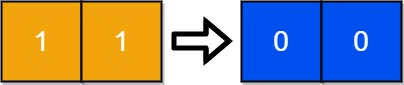

Input: grid = [[1,1]]
Output: 2
Explanation: Grid of full water is also disconnected ([[1,1]] -> [[0,0]]), 0 islands.

 

Constraints:

    m == grid.length
    n == grid[i].length
    1 <= m, n <= 30
    grid[i][j] is either 0 or 1.


In [ ]:
class Solution:
    def minDays(self, grid: List[List[int]]) -> int:
        rows, cols = len(grid), len(grid[0])

        def _count_islands():
            visited = set()
            count = 0
            for i in range(rows):
                for j in range(cols):
                    if grid[i][j] == 1 and (i, j) not in visited:
                        _explore_island(i, j, visited)
                        count += 1
            return count

        def _explore_island(i, j, visited):
            if (
                i < 0
                or i >= rows
                or j < 0
                or j >= cols
                or grid[i][j] == 0
                or (i, j) in visited
            ):
                return
            visited.add((i, j))
            for di, dj in [(0, 1), (1, 0), (0, -1), (-1, 0)]:
                _explore_island(i + di, j + dj, visited)

        # Check if already disconnected
        if _count_islands() != 1:
            return 0

        # Check if can be disconnected in 1 day
        for i in range(rows):
            for j in range(cols):
                if grid[i][j] == 1:
                    grid[i][j] = 0
                    if _count_islands() != 1:
                        return 1
                    grid[i][j] = 1

        # If can't be disconnected in 0 or 1 day, return 2
        return 2